![for sale image, from https://time.com/5835778/selling-home-coronavirus/](https://api.time.com/wp-content/uploads/2020/05/selling-home-coronavirus.jpg?w=800&quality=85)

# KING COUNTY HOME PRICE PREDICTION

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders? 

Real estate agency helping home buyers.

- What are your stakeholders' pain points related to this project?

- Why are your predictions important from a business perspective?

In [1]:
# Basic imports
import numpy as np
import pandas as pd
# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# Metrics
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [2]:
# importing utility functions
# from utils import evaluate
# OR
# import utils as ut

In [3]:
# # utils.py
# import matplotlib.pyplot as plt
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate(y_train, train_preds, y_test, test_preds):
    '''
    Evaluate the amount of error between my model's predictionms and the actual values
    for both a train and a test set
    
    Inputs: 
        y_train - array like, actual values for 'price for my train dataset
        train_preds - array like, predicted values for 'price' for my train dataset
        y_test
        test_preds
    
    Outputs:
        None
    '''
    print(f"Train R2: {r2_score(y_train, train_preds):.4f}")
    print(f"Test R2: {r2_score(y_test, test_preds):.4f}")
    print("*****")
    print(f"Train RMSE: ${mean_squared_error(y_train, train_preds, squared=False):,.2f}")
    print(f"Train RMSE: ${mean_squared_error(y_test, test_preds, squared=False):,.2f}")
    print("*****")
    print(f"Train MAE: ${mean_absolute_error(y_train, train_preds):,.2f}")
    print(f"Train MAE: ${mean_absolute_error(y_test, test_preds):,.2f}")
    print("*****")
    
    # Calculate our residuals 
    train_residuals = y_train - train_preds
    test_residuals = y_test - test_preds
    
    # Scatter plot 
    plt.scatter(train_preds, train_residuals, label = 'Train')
    plt.scatter(test_preds, test_residuals, label = 'Test')
    
    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    
    sm.qqplot(train_residuals, line = 'r', label = 'train residuals');
    plt.legend()
    
    sm.qqplot(test_residuals, line = 'r', label = 'test residuals');
    plt.legend()
    plt.show()
    
    

In [4]:
!ls ../../data

column_names.md
kc_house_data.csv


In [5]:
# To visualize the hidden columns in data
pd.options.display.max_columns=100 

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [6]:
# code here to explore your data
df = pd.read_csv("../../data/kc_house_data.csv")

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
df.shape

(21597, 21)

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Price is the target variable for our business problem.

The data includes Kings County houses' information and sell prices from 1900 to 2015.

In [10]:
#sns.pairplot(df)

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [11]:
df['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [12]:
df[df['id']==795000620] # Multiple rows for same house means that the house is sold multiple times!

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,NO,NONE,Fair,5 Fair,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,NO,NONE,Fair,5 Fair,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,NONE,Fair,5 Fair,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


We should keep the multiple rows to reflect price change over the years. 

In [13]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [14]:
df[df['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


It is impossible to have 33 bedrooms house with 1620 sqrt living area and 1 floor. There must be typing error. We should replace 33 with the mean of number of bedrooms, which is 3.

In [15]:
df['bedrooms'].replace(33, 3, inplace=True)

In [16]:
df['bedrooms'].value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [17]:
df[df['bedrooms']==11]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,8/21/2014,520000.0,11,3.0,3000,4960,2.0,NO,NONE,Average,7 Average,2400,600.0,1918,1999.0,98106,47.556,-122.363,1420,4960


In [18]:
df[df['bedrooms']==10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,NO,AVERAGE,Average,9 Better,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,NO,NONE,Good,7 Average,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,NO,NONE,Good,7 Average,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745


Houses with 11 and 10 bedrooms looks okay for the analysis.

In [19]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [20]:
df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [21]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
475.0         1
1245.0        1
2360.0        1
2180.0        1
518.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [22]:
# sqft_basement has ? as a value, we should 
df[df['sqft_basement'] == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,NO,NONE,Good,7 Average,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,NO,NONE,Average,9 Better,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,NO,NONE,Average,10 Very Good,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,NO,NONE,Good,7 Average,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,NO,NONE,Average,7 Average,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,NO,NONE,Average,7 Average,2330,?,2013,NaN,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,NaN,NONE,Average,8 Good,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,NO,NONE,Average,7 Average,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [23]:
df['sqft_basement_dif'] = df['sqft_living'] - df['sqft_above']

In [24]:
df[['sqft_basement_dif', 'sqft_basement']]

,sqft_basement_dif,sqft_basement
0,0,0.0
1,400,400.0
2,0,0.0
3,910,910.0
4,0,0.0
...,...,...
21592,0,0.0
21593,0,0.0
21594,0,0.0
21595,0,0.0


#### Check null values in the dataframe

In [25]:
df.isna().sum()

id                      0
date                    0
price                   0
bedrooms                0
bathrooms               0
sqft_living             0
sqft_lot                0
floors                  0
waterfront           2376
view                   63
condition               0
grade                   0
sqft_above              0
sqft_basement           0
yr_built                0
yr_renovated         3842
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
sqft_basement_dif       0
dtype: int64

The columns named as waterfront, view, and yr_renovated have null values.

In [26]:
# waterfront indicates Whether the house is on a waterfront
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [27]:
df[(df['waterfront']!= 'YES') & (df['waterfront']!= 'NO')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_dif
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,NONE,Average,8 Good,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925,1700
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,NaN,NONE,Average,7 Average,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386,0
40,5547700270,7/15/2014,625000.0,4,2.50,2570,5520,2.0,NaN,NONE,Average,9 Better,2570,0.0,2000,NaN,98074,47.6145,-122.027,2470,5669,0
55,9822700295,5/12/2014,885000.0,4,2.50,2830,5000,2.0,NaN,NONE,Average,9 Better,2830,0.0,1995,0.0,98105,47.6597,-122.290,1950,5000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,5087900040,10/17/2014,350000.0,4,2.75,2500,5995,2.0,NaN,NONE,Average,8 Good,2500,0.0,2008,0.0,98042,47.3749,-122.107,2530,5988,0
21582,8956200760,10/13/2014,541800.0,4,2.50,3118,7866,2.0,NaN,AVERAGE,Average,9 Better,3118,0.0,2014,0.0,98001,47.2931,-122.264,2673,6500,0
21586,844000965,6/26/2014,224000.0,3,1.75,1500,11968,1.0,NaN,NONE,Average,6 Low Average,1500,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303,0
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,NONE,Average,8 Good,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731,0


Let's convert YES value as 1, NO value as 0, and also replace NaN values with 0:

In [28]:
df['waterfront'].replace("YES", 1, inplace=True)

In [29]:
df['waterfront'].replace("NO", 0, inplace=True)

In [30]:
df['waterfront'].fillna(value=0,inplace=True)

In [31]:
df['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [32]:
df.isna().sum()

id                      0
date                    0
price                   0
bedrooms                0
bathrooms               0
sqft_living             0
sqft_lot                0
floors                  0
waterfront              0
view                   63
condition               0
grade                   0
sqft_above              0
sqft_basement           0
yr_built                0
yr_renovated         3842
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
sqft_basement_dif       0
dtype: int64

In [33]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [34]:
df['view'].fillna(value="None",inplace=True)

We replaced null values of views of the column as None.

In [35]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

Most of the houses are not renovated, so we can replace NaN values with zero.

In [36]:
df['yr_renovated'].fillna(value=0,inplace=True)

In [37]:
df.isna().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
sqft_basement_dif    0
dtype: int64

We cleaned all of the missing values from our dataframe.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21597 non-null  int64  
 1   date               21597 non-null  object 
 2   price              21597 non-null  float64
 3   bedrooms           21597 non-null  int64  
 4   bathrooms          21597 non-null  float64
 5   sqft_living        21597 non-null  int64  
 6   sqft_lot           21597 non-null  int64  
 7   floors             21597 non-null  float64
 8   waterfront         21597 non-null  float64
 9   view               21597 non-null  object 
 10  condition          21597 non-null  object 
 11  grade              21597 non-null  object 
 12  sqft_above         21597 non-null  int64  
 13  sqft_basement      21597 non-null  object 
 14  yr_built           21597 non-null  int64  
 15  yr_renovated       21597 non-null  float64
 16  zipcode            215

The columns named 'date', 'view', 'condition', 'grade', and 'sqrt_basement' are stored as objects, not numerical values.

In [39]:
df.select_dtypes(include = 'object')

,date,view,condition,grade,sqft_basement
0,10/13/2014,NONE,Average,7 Average,0.0
1,12/9/2014,NONE,Average,7 Average,400.0
2,2/25/2015,NONE,Average,6 Low Average,0.0
3,12/9/2014,NONE,Very Good,7 Average,910.0
4,2/18/2015,NONE,Average,8 Good,0.0
...,...,...,...,...,...
21592,5/21/2014,NONE,Average,8 Good,0.0
21593,2/23/2015,NONE,Average,8 Good,0.0
21594,6/23/2014,NONE,Average,7 Average,0.0
21595,1/16/2015,NONE,Average,8 Good,0.0


In [40]:
# Split up 'condition' column: Change it from object datatype to numerical datatype for analysis:
# condition column has 5 categories and they will need to be expanded into multiple columns.

In [41]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [42]:
# (1) Create a variable condition_qu_train
# extracted from X_train
# (double brackets due to shape expected by OHE)
condition_df = df[["condition"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe.fit(condition_df)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['Average', 'Fair', 'Good', 'Poor', 'Very Good'], dtype=object)]

In [43]:
# (4) Transform condition_df using the encoder and
# assign the result to condition_df_encoded
condition_df_encoded = ohe.transform(condition_df)

# Visually inspect condition_df_encoded
condition_df_encoded

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [44]:
# (5a) Make the transformed data into a dataframe
condition_df_encoded = pd.DataFrame(
    # Pass in NumPy array
    condition_df_encoded,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=df.index
)

# Visually inspect new dataframe
condition_df_encoded.head(20)

,Average,Fair,Good,Poor,Very Good
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0


In [45]:
# (5b) Concatenate the new dataframe with current df
df_condition_expanded = pd.concat([df, condition_df_encoded], axis=1)

# Visually inspect df
df_condition_expanded.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_dif,Average,Fair,Good,Poor,Very Good
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,1.0,0.0,0.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,1.0,0.0,0.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,1.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,910,0.0,0.0,0.0,0.0,1.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,1.0,0.0,0.0,0.0,0.0


By this work, we expanded 'condition' column into 5 different columns.

In [46]:
# We will look this after changing objects to numerics.
np.abs(df.corr()['price']).sort_values(ascending=False)

price                1.000000
sqft_living          0.701917
sqft_above           0.605368
sqft_living15        0.585241
bathrooms            0.525906
sqft_basement_dif    0.323799
bedrooms             0.315954
lat                  0.306692
waterfront           0.264306
floors               0.256804
yr_renovated         0.117855
sqft_lot             0.089876
sqft_lot15           0.082845
yr_built             0.053953
zipcode              0.053402
long                 0.022036
id                   0.016772
Name: price, dtype: float64

We see from the above correlation coefficients that, 'sqrt_living' column has the highest correlation coefficient with the 'price' column. If we want to build a simple linear regression model to predict 'price' of the houses, we should choose 'sqrt_living' as our independent variable.

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

In [47]:
X = df.drop(columns=['id', 'price'])
y = df['price']

In [48]:
# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [49]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

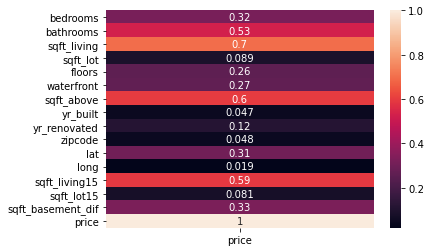

In [50]:
# Absolute value correlations with price
sns.heatmap(abs(train_df.corr())[['price']], annot=True);

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [51]:
# code here to arrive at a baseline prediction
train_target_mean = y_train.mean()
train_target_mean

541284.4615669568

In [52]:
baseline_train_preds = [train_target_mean]*len(y_train)

In [53]:
baseline_test_preds = [train_target_mean]*len(y_test)

Train R2: 0.0000
Test R2: -0.0001
*****
Train RMSE: $366,333.44
Train RMSE: $370,425.86
*****
Train MAE: $234,722.63
Train MAE: $233,000.84
*****


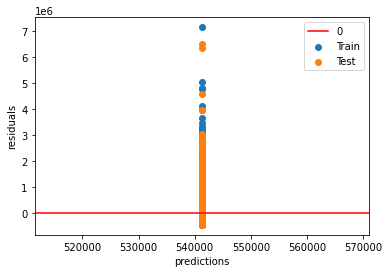

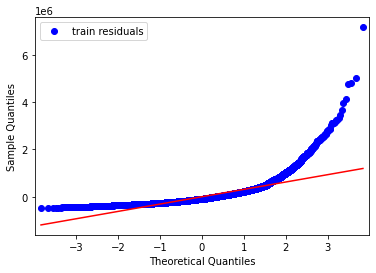

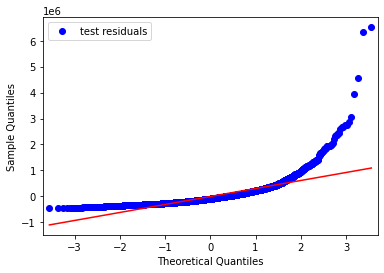

In [54]:
evaluate(y_train, baseline_train_preds, y_test, baseline_test_preds)

### First Substandard Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

-- Using 'sqft_living' column as a predictor for 'price' target variable.

In [55]:
# code here for your first 'substandard' model
fsm_X_train= X_train['sqft_living']
fsm_X_test = X_test['sqft_living']

In [56]:
# code here to evaluate your first 'substandard' model
fsm = sm.OLS(y_train, sm.add_constant(fsm_X_train)).fit()

In [57]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.559e+04
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:25:33   Log-Likelihood:            -2.2503e+05
No. Observations:               16197   AIC:                         4.501e+05
Df Residuals:                   16195   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.099e+04   5095.343     -8.044      0.000    -5.1e+04    -3.1e+04
sqft_living   279.4423      2.238    124.878      0.000     275.056     283.828
==============================================================================
Omnibus:                    10430.239   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           291279.150
Skew:                           2.656   Prob(JB):                         0.00
Kurtosis:                      23.084   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
fsm_train_preds = fsm.predict(sm.add_constant(fsm_X_train))
fsm_test_preds = fsm.predict(sm.add_constant(fsm_X_test))

Train R2: 0.4906
Test R2: 0.4989
*****
Train RMSE: $261,471.87
Train RMSE: $262,216.52
*****
Train MAE: $174,170.69
Train MAE: $171,964.83
*****


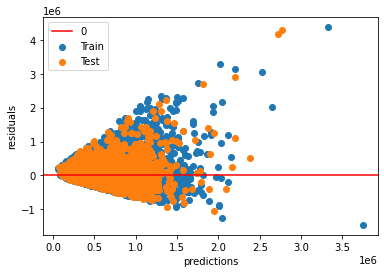

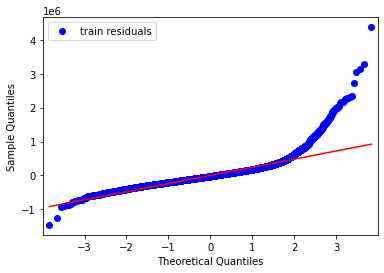

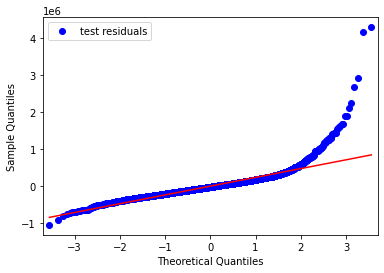

In [59]:
evaluate(y_train, fsm_train_preds, y_test, fsm_test_preds)

As seen from the residuals plot above, there is heteroskedasticity problem, which means that the spread of residuals is different at different levels of the fitted values. In order to overcome heteroskedasticity, we can do variable transformation (log) of the 'sgft_living' column. 

In [60]:
logged_fsm_X_train= np.log(X_train['sqft_living'])
logged_fsm_X_test = np.log(X_test['sqft_living'])

In [61]:
fsm_logged = sm.OLS(y_train, sm.add_constant(logged_fsm_X_train)).fit()

In [62]:
fsm_logged.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     9763.
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:25:34   Log-Likelihood:            -2.2667e+05
No. Observations:               16197   AIC:                         4.533e+05
Df Residuals:                   16195   BIC:                         4.534e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.458e+06   4.05e+04    -85.301      0.000   -3.54e+06   -3.38e+06
sqft_living  5.296e+05   5359.735     98.807      0.000    5.19e+05     5.4e+05
==============================================================================
Omnibus:                    13626.721   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           859988.112
Skew:                           3.671   Prob(JB):                         0.00
Kurtosis:                      37.934   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
logged_fsm_train_preds = fsm_logged.predict(sm.add_constant(logged_fsm_X_train))
logged_fsm_test_preds = fsm_logged.predict(sm.add_constant(logged_fsm_X_test))

Train R2: 0.3761
Test R2: 0.3691
*****
Train RMSE: $289,355.84
Train RMSE: $294,202.14
*****
Train MAE: $187,853.68
Train MAE: $186,154.62
*****


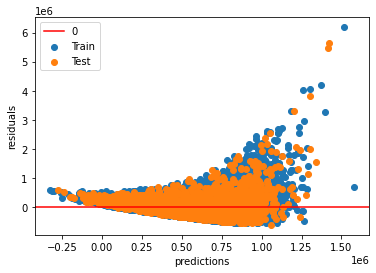

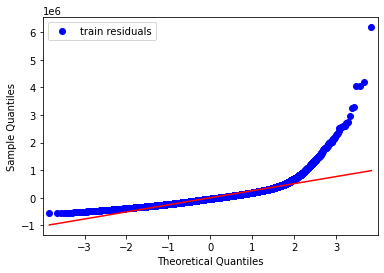

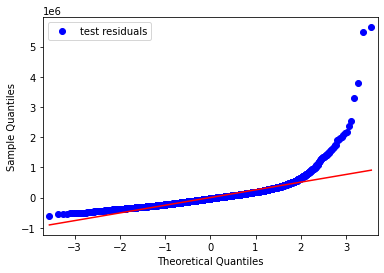

In [64]:
evaluate(y_train, logged_fsm_train_preds, y_test, logged_fsm_test_preds)

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

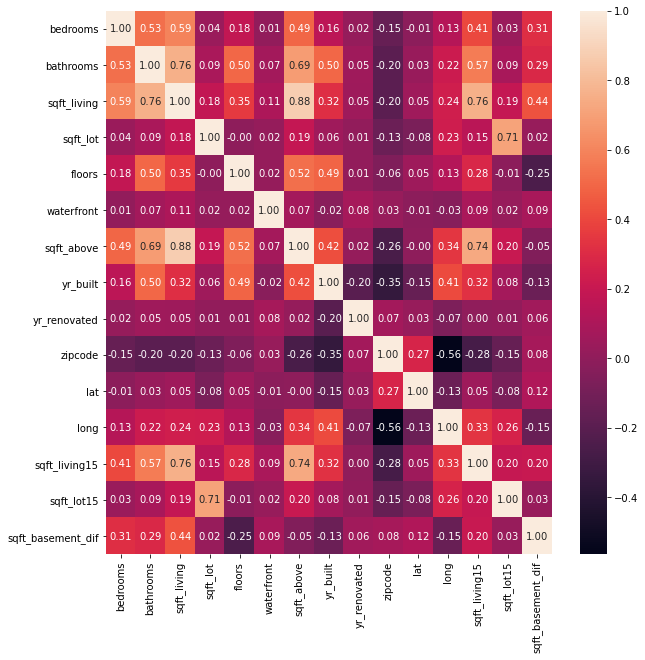

In [65]:
# Let's start looking into correlation matrix to decide new independent variables and check multicollinearity
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(), annot=True, fmt='.2f');

For better analysis, we decided to add more independent variables to the model. 

#### MODEL 1
We will use 'sqft_living', 'floors', 'bedrooms', 'bathrooms' columns from the dataframe, and we will create a new 'house_age' column for the analysis.  

In [66]:
X_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_dif
count,16197.000000,16197.000000,16197.000000,1.619700e+04,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000
mean,3.372229,2.116426,2083.693030,1.507189e+04,1.494752,0.006853,1790.467926,1971.019942,67.419522,98078.100080,47.560975,-122.213720,1987.809286,12784.065074,293.225103
std,0.905951,0.768049,918.209756,4.077585e+04,0.540474,0.082502,827.598600,29.325399,360.641442,53.486457,0.138273,0.141639,685.189105,26833.379871,443.148845
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,3.000000,1.750000,1430.000000,5.058000e+03,1.000000,0.000000,1200.000000,1952.000000,0.000000,98033.000000,47.472500,-122.329000,1490.000000,5100.000000,0.000000
50%,3.000000,2.250000,1912.000000,7.620000e+03,1.500000,0.000000,1560.000000,1975.000000,0.000000,98065.000000,47.573300,-122.231000,1840.000000,7620.000000,0.000000
75%,4.000000,2.500000,2560.000000,1.072000e+04,2.000000,0.000000,2220.000000,1997.000000,0.000000,98117.000000,47.678300,-122.124000,2360.000000,10086.000000,570.000000
max,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,4820.000000


In [67]:
X_test.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_dif
count,5400.000000,5400.000000,5400.000000,5.400000e+03,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000
mean,3.370556,2.114028,2070.210185,1.518194e+04,1.492130,0.006481,1782.984630,1970.938889,72.773519,98077.507222,47.557447,-122.214770,1983.054074,12680.953148,287.225556
std,0.898592,0.771851,917.805949,4.327026e+04,0.537347,0.080254,828.294279,29.526848,374.044172,53.595322,0.139365,0.137951,685.405621,28558.979278,441.232142
min,1.000000,0.750000,410.000000,6.090000e+02,1.000000,0.000000,410.000000,1900.000000,0.000000,98001.000000,47.162200,-122.515000,670.000000,659.000000,0.000000
25%,3.000000,1.750000,1420.000000,5.001000e+03,1.000000,0.000000,1190.000000,1951.000000,0.000000,98032.000000,47.465725,-122.327000,1480.000000,5100.000000,0.000000
50%,3.000000,2.250000,1910.000000,7.616500e+03,1.500000,0.000000,1550.000000,1975.000000,0.000000,98065.000000,47.568900,-122.228000,1830.000000,7619.500000,0.000000
75%,4.000000,2.500000,2520.000000,1.058800e+04,2.000000,0.000000,2200.000000,1997.000000,0.000000,98118.000000,47.677500,-122.127000,2370.000000,10080.000000,550.000000
max,10.000000,7.750000,10040.000000,1.164794e+06,3.000000,1.000000,8860.000000,2015.000000,2015.000000,98199.000000,47.777500,-121.315000,5790.000000,858132.000000,3260.000000


In [68]:
train_df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_dif,price
6405,3/4/2015,3,2.50,1880,4499,2.0,0.0,NONE,Average,8 Good,1880,0.0,1993,0.0,98029,47.5664,-121.999,2130,5114,0,529000.0
937,10/7/2014,3,2.50,2020,6564,1.0,0.0,NONE,Average,7 Average,1310,710.0,1994,0.0,98042,47.3545,-122.158,1710,5151,710,253000.0
19076,1/16/2015,5,4.00,4720,493534,2.0,0.0,NONE,Very Good,9 Better,3960,760.0,1975,0.0,98027,47.4536,-122.009,2160,219542,760,745000.0
15201,3/30/2015,2,2.00,1430,3880,1.0,0.0,NONE,Good,7 Average,1430,0.0,1949,0.0,98117,47.6844,-122.392,1430,3880,0,545000.0
13083,10/14/2014,3,2.25,2270,32112,1.0,0.0,NONE,Good,8 Good,1740,530.0,1980,0.0,98042,47.3451,-122.094,2310,41606,530,390000.0


In [69]:
test_df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_dif,price
3686,2/20/2015,3,0.75,850,8573,1.0,0.0,NONE,Average,6 Low Average,600,250.0,1945,0.0,98146,47.5030,-122.356,850,8382,250,132500.0
10247,10/8/2014,3,1.00,1510,6083,1.0,0.0,NONE,Good,6 Low Average,860,650.0,1940,0.0,98115,47.6966,-122.324,1510,5712,650,415000.0
4037,3/25/2015,4,2.25,1790,42000,1.0,0.0,NONE,Average,7 Average,1170,620.0,1983,0.0,98045,47.4819,-121.744,2060,50094,620,494000.0
3437,2/17/2015,2,1.50,1140,2500,1.0,0.0,FAIR,Average,7 Average,630,510.0,1988,0.0,98106,47.5707,-122.359,1500,5000,510,355000.0
19291,5/23/2014,3,1.00,1500,3920,1.0,0.0,NONE,Average,7 Average,1000,500.0,1947,0.0,98107,47.6718,-122.359,1640,4017,500,606000.0


Let's start filtering dataframes by choosing the relevant columns.

In [70]:
relevant_columns = ['price', 'sqft_living', 'floors', 'bedrooms', 'bathrooms', 'yr_built', 'yr_renovated', 'zipcode']

In [71]:
model1_train_df = train_df[relevant_columns]
model1_train_df['house_age'] = [2021]*len(model1_train_df['yr_built']) - model1_train_df['yr_built']
model1_train_df

<ipython-input-71-ef7125841e46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model1_train_df['house_age'] = [2021]*len(model1_train_df['yr_built']) - model1_train_df['yr_built']


,price,sqft_living,floors,bedrooms,bathrooms,yr_built,yr_renovated,zipcode,house_age
6405,529000.0,1880,2.0,3,2.50,1993,0.0,98029,28
937,253000.0,2020,1.0,3,2.50,1994,0.0,98042,27
19076,745000.0,4720,2.0,5,4.00,1975,0.0,98027,46
15201,545000.0,1430,1.0,2,2.00,1949,0.0,98117,72
13083,390000.0,2270,1.0,3,2.25,1980,0.0,98042,41
...,...,...,...,...,...,...,...,...,...
11964,440000.0,2230,2.0,3,2.50,2004,0.0,98065,17
21575,572000.0,2770,2.0,4,2.75,2014,0.0,98178,7
5390,299800.0,1530,1.0,4,1.50,1976,0.0,98014,45
860,245000.0,380,1.0,1,0.75,1963,0.0,98168,58


In [72]:
model1_test_df = test_df[relevant_columns]
model1_test_df['house_age'] = [2021]*len(model1_test_df['yr_built']) - model1_test_df['yr_built']
model1_test_df

<ipython-input-72-a627ce57a701>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model1_test_df['house_age'] = [2021]*len(model1_test_df['yr_built']) - model1_test_df['yr_built']


,price,sqft_living,floors,bedrooms,bathrooms,yr_built,yr_renovated,zipcode,house_age
3686,132500.0,850,1.0,3,0.75,1945,0.0,98146,76
10247,415000.0,1510,1.0,3,1.00,1940,0.0,98115,81
4037,494000.0,1790,1.0,4,2.25,1983,0.0,98045,38
3437,355000.0,1140,1.0,2,1.50,1988,0.0,98106,33
19291,606000.0,1500,1.0,3,1.00,1947,0.0,98107,74
...,...,...,...,...,...,...,...,...,...
18276,397000.0,1170,1.0,5,1.00,1944,0.0,98125,77
15003,615000.0,1670,1.0,3,1.75,1954,0.0,98144,67
13478,1330000.0,3260,2.0,4,2.25,1907,0.0,98112,114
18399,784500.0,5820,2.0,4,5.00,1993,0.0,98042,28


In [73]:
model1_X_train = model1_train_df[['sqft_living', 'floors', 'bedrooms', 'bathrooms', 'house_age']]
model1_y_train = model1_train_df['price']

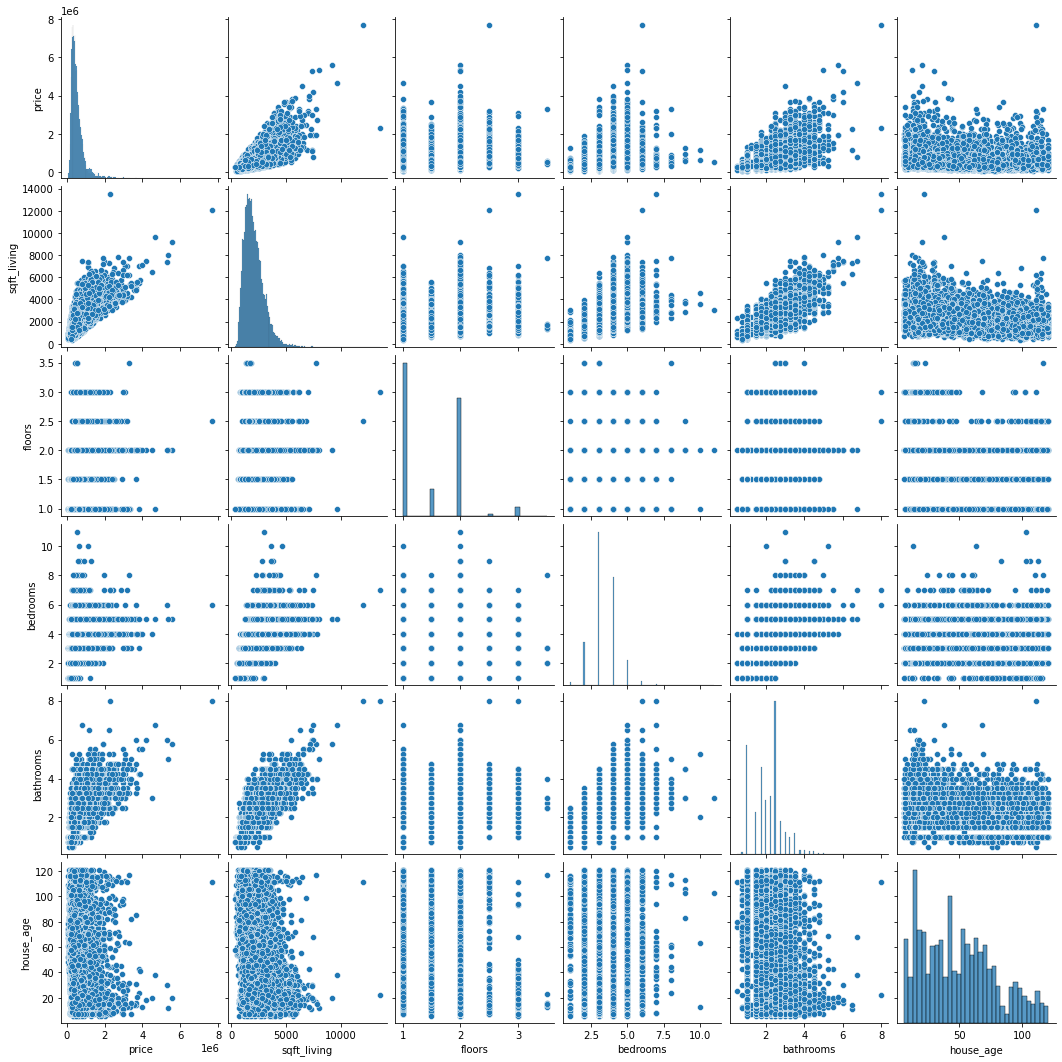

In [74]:
sns.pairplot(model1_train_df[['price', 'sqft_living', 'floors', 'bedrooms', 'bathrooms', 'house_age']]);

In [75]:
model1 = sm.OLS(model1_y_train, sm.add_constant(model1_X_train)).fit()

In [76]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     4064.
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:25:43   Log-Likelihood:            -2.2390e+05
No. Observations:               16197   AIC:                         4.478e+05
Df Residuals:                   16191   BIC:                         4.479e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.545e+05   1.15e+04    -22.091      0.000   -2.77e+05   -2.32e+05
sqft_living   298.2750      3.433     86.895      0.000     291.547     305.003
floors       5.862e+04   4338.399     13.511      0.000    5.01e+04    6.71e+04
bedrooms    -7.106e+04   2684.590    -26.470      0.000   -7.63e+04   -6.58e+04
bathrooms    7.198e+04   4453.384     16.162      0.000    6.32e+04    8.07e+04
house_age    3481.0349     80.299     43.351      0.000    3323.640    3638.430
==============================================================================
Omnibus:                    10110.163   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           286725.595
Skew:                           2.531   Prob(JB):                         0.00
Kurtosis:                      22.981   Cond. No.                     1.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
model1_X_test = model1_test_df[['sqft_living', 'floors', 'bedrooms', 'bathrooms', 'house_age']]
model1_y_test = model1_test_df['price']

In [78]:
model1_train_preds = model1.predict(sm.add_constant(model1_X_train))
model1_test_preds = model1.predict(sm.add_constant(model1_X_test))

Train R2: 0.5565
Test R2: 0.5579
*****
Train RMSE: $243,950.08
Train RMSE: $246,277.37
*****
Train MAE: $159,636.44
Train MAE: $159,371.09
*****


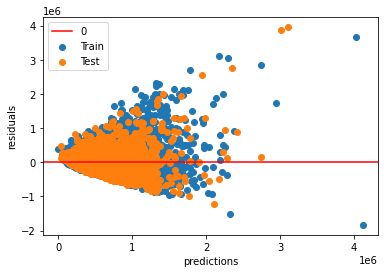

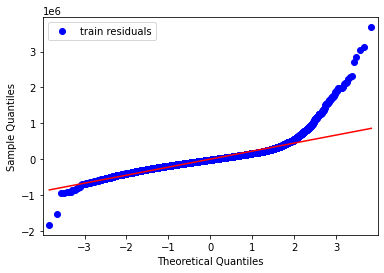

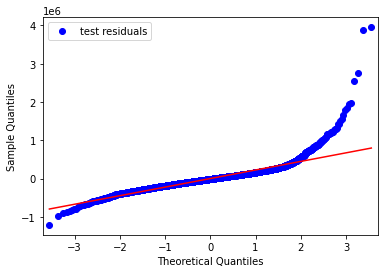

In [79]:
evaluate(model1_y_train, model1_train_preds, model1_y_test, model1_test_preds)

R2 is increased to 0.55, better than simple linear regression model. But not netter enough.

In [80]:
# Proximity to Downtown: (We used Google Maps to
# determine the mileage from a given property to the center of
# downtown. Downtown Seattle 47.6050° N, 122.3344° W)

In [81]:
# code here to iteratively improve your models

In [82]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [83]:
# code here to show your final model

In [84]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
